In [1]:
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

In [3]:
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 16
plt.rcParams['xtick.minor.size'] = 9
plt.rcParams['ytick.major.size'] = 16
plt.rcParams['ytick.minor.size'] = 9
plt.rcParams['ytick.minor.size'] = 9
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.minor.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.minor.width'] = 2.5
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.pad'] = 9
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
plt.rcParams['axes.titlesize'] = 20
plt.rcParams.update({'font.size': 30})

In [14]:
henesampledf = pd.read_csv('henesample.csv')
henebarrodf = pd.read_csv('henebarrodf.csv')
clearbarrodf = pd.read_csv('clearbarrodf.csv')
nevdf = pd.read_csv('nevdf.csv')
heiidf = pd.read_csv('heiidf.csv')
nevxraydf = pd.read_csv('nevxraydf.csv')
heiixraydf = pd.read_csv('heiixraydf.csv')

C:\Users\nikko\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


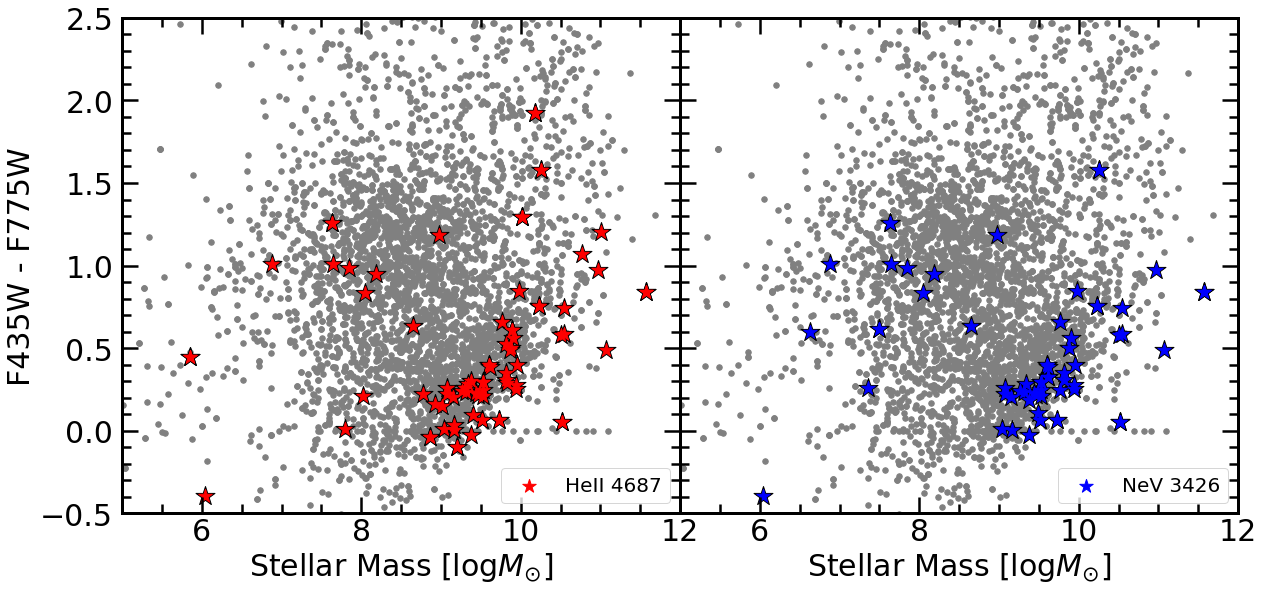

In [4]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.scatter(clearbarrodf['td_lmass'] , -2.5*np.log10(clearbarrodf['ACS_F435W_FLUX']/clearbarrodf['ACS_F775W_FLUX']) , s = 30 , c = 'gray')
ax0.scatter(heiidf['td_lmass'] , -2.5*np.log10(heiidf['ACS_F435W_FLUX']/heiidf['ACS_F775W_FLUX']) , s = 400 , c = 'black' , marker = '*')
ax0.scatter(heiidf['td_lmass'] , -2.5*np.log10(heiidf['ACS_F435W_FLUX']/heiidf['ACS_F775W_FLUX']) , s = 200 , c = 'red' , marker = '*' , label = 'HeII 4687')
ax0.axis([5 , 12  ,  -.5 , 2.5])
ax0.set_ylabel("F435W - F775W")
ax0.set_xlabel("Stellar Mass [log$M_{\odot}]$")
ax0.legend()
ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(clearbarrodf['td_lmass'] , -2.5*np.log10(clearbarrodf['ACS_F435W_FLUX']/clearbarrodf['ACS_F775W_FLUX']) , s = 30 , c = 'gray')
ax1.scatter(nevdf['td_lmass'] , -2.5*np.log10(nevdf['ACS_F435W_FLUX']/nevdf['ACS_F775W_FLUX']) , s = 400 , c = 'black' , marker = '*')
ax1.scatter(nevdf['td_lmass'] , -2.5*np.log10(nevdf['ACS_F435W_FLUX']/nevdf['ACS_F775W_FLUX']) , s = 200 , c = 'blue' , marker = '*' , label = 'NeV 3426')
ax1.axis([5 , 12  ,  -.5 , 2.5])
ax1.tick_params(labelleft = False)
ax1.set_xlabel("Stellar Mass [log$M_{\odot}]$")
ax1.legend()
plt.show()

[5, 12, -0.5, 2.5]

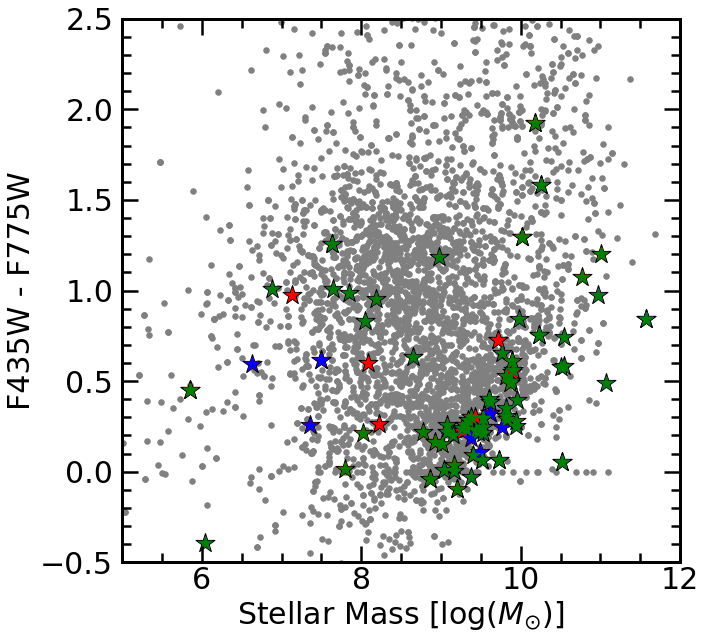

In [6]:
plt.figure(figsize = (10,10))
plt.rcParams.update({'font.size': 30})
plt.scatter(clearbarrodf['td_lmass'] , -2.5*np.log10(clearbarrodf['ACS_F435W_FLUX']/clearbarrodf['ACS_F775W_FLUX']) , s = 30 , c = 'gray')
plt.scatter(henebarrodf['td_lmass'] , -2.5*np.log10(henebarrodf['ACS_F435W_FLUX']/henebarrodf['ACS_F775W_FLUX']) , s = 400 , c = 'black' , marker = '*')
plt.scatter(henebarrodf['td_lmass'] , -2.5*np.log10(henebarrodf['ACS_F435W_FLUX']/henebarrodf['ACS_F775W_FLUX']) , s = 200 , c = 'red' , marker = '*')
plt.scatter(nevdf['td_lmass'] , -2.5*np.log10(nevdf['ACS_F435W_FLUX']/nevdf['ACS_F775W_FLUX']) , s = 200 , c = 'blue' , marker = '*')
plt.scatter(heiidf['td_lmass'] , -2.5*np.log10(heiidf['ACS_F435W_FLUX']/heiidf['ACS_F775W_FLUX']) , s = 200 , c = 'green' , marker = '*')
plt.ylabel("F435W - F775W")
plt.xlabel("Stellar Mass [log($M_{\odot})]$")
plt.axis([5 , 12  ,  -.5 , 2.5])

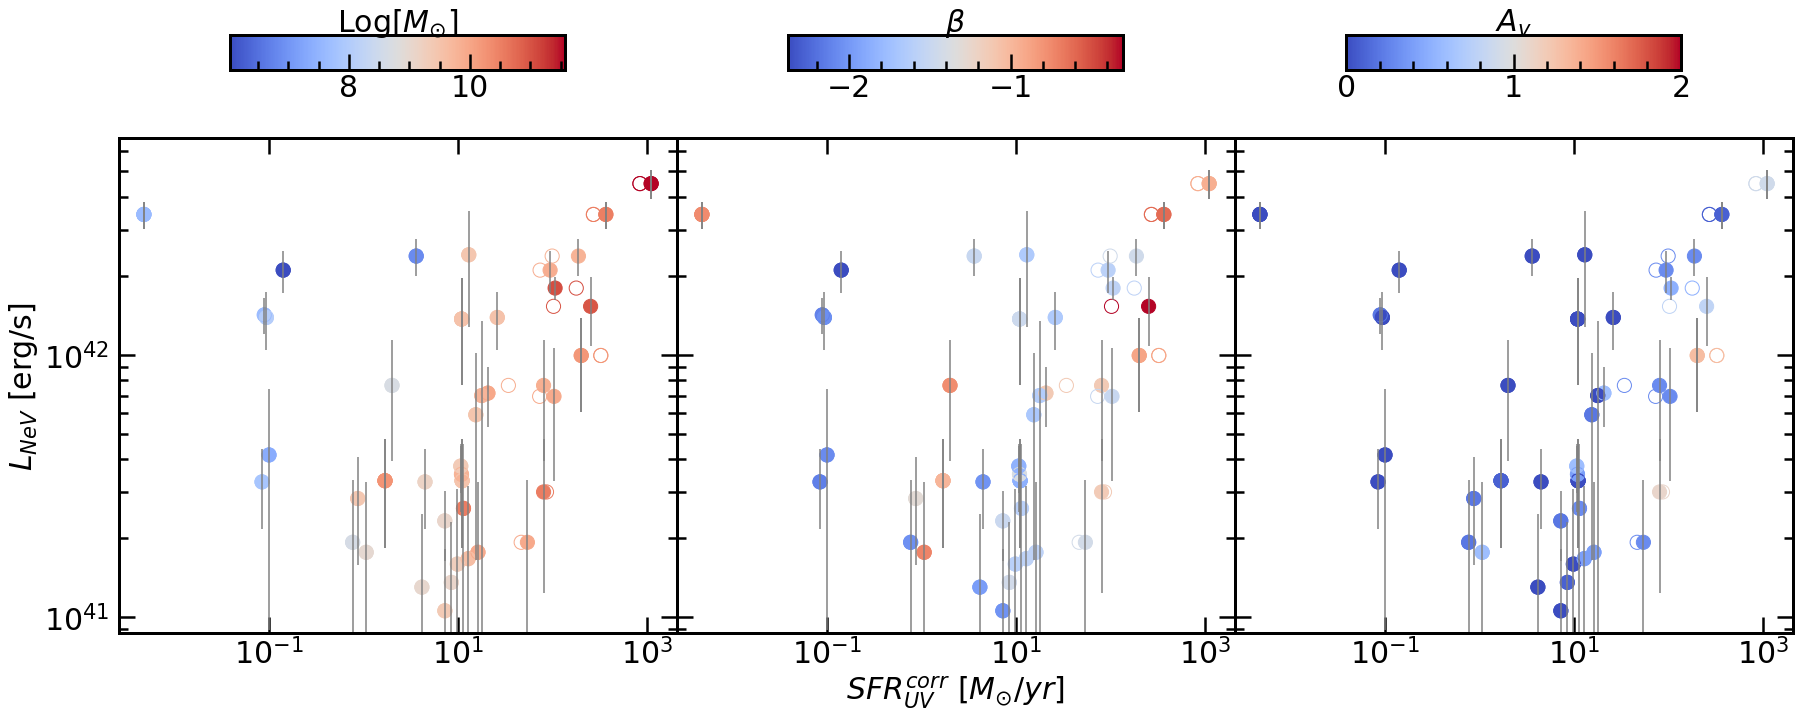

In [32]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{NeV}$ [erg/s]")
y0 = ax0.scatter(nevdf['ir_SFR-UV_corr'], nevdf['NeV_L'], s=200, c=nevdf['td_lmass'], cmap='coolwarm')
ax0.errorbar(nevdf['ir_SFR-UV_corr'] , nevdf['NeV_L'] , yerr = nevdf['NeV_L_ERR']  , linestyle = 'None' , c = 'grey' )
#ax0.axis([min(nevdf['ir_SFR-UV_corr']) -10**-6 , max(nevdf['ir_SFR-UV_corr']) + 10 , min(nevdf['NeV_L']) - 10**36, max(nevdf['NeV_L'])  + 10**41])
scatterdots = ax0.scatter(nevdf['ir_SFR-ladder_total'], nevdf['NeV_L'], s=200, c=nevdf['td_lmass'], cmap='coolwarm')
scatterdots.set_facecolor('none') 
#ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]")
y1 = ax1.scatter(nevdf['ir_SFR-UV_corr'], nevdf['NeV_L'], s=200, c=nevdf['ir_UV_beta'], cmap='coolwarm')
ax1.errorbar(nevdf['ir_SFR-UV_corr'] , nevdf['NeV_L'] , yerr = nevdf['NeV_L_ERR']  , linestyle = 'None' , c = 'grey' )
#ax1.axis([min(nevdf['ir_SFR-UV_corr']) -10**-6 , max(nevdf['ir_SFR-UV_corr']) + 10 , min(nevdf['NeV_L']) - 10**36, max(nevdf['NeV_L'])  + 10**41])
scatterdots1 = ax1.scatter(nevdf['ir_SFR-ladder_total'], nevdf['NeV_L'], s=200, c=nevdf['ir_UV_beta'], cmap='coolwarm')
scatterdots1.set_facecolor('none') 
#ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(nevdf['ir_SFR-UV_corr'], nevdf['NeV_L'], s=200, c=nevdf['td_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2)
ax2.errorbar(nevdf['ir_SFR-UV_corr'] , nevdf['NeV_L'] , yerr = nevdf['NeV_L_ERR']  , linestyle = 'None' , c = 'grey' )
#ax2.axis([min(nevdf['ir_SFR-UV_corr']) -10**-6 , max(nevdf['ir_SFR-UV_corr']) + 10 , min(nevdf['NeV_L']) - 10**36, max(nevdf['NeV_L'])  + 10**41])
scatterdots2 = ax2.scatter(nevdf['ir_SFR-ladder_total'], nevdf['NeV_L'], s=200, c=nevdf['td_Av'], cmap='coolwarm' , vmin = 0 , vmax = 2 )
scatterdots2.set_facecolor('none') 
#ax2.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax2.tick_params(labelleft = False)
ax2.set_xscale('log')
ax2.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'Log$[M_{\odot}]$')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$\beta$')
ax4.xaxis.set_label_position('top')
ax5 = fig.add_subplot(gs[0:1,11:14])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = '$A_v$')
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')

plt.show()

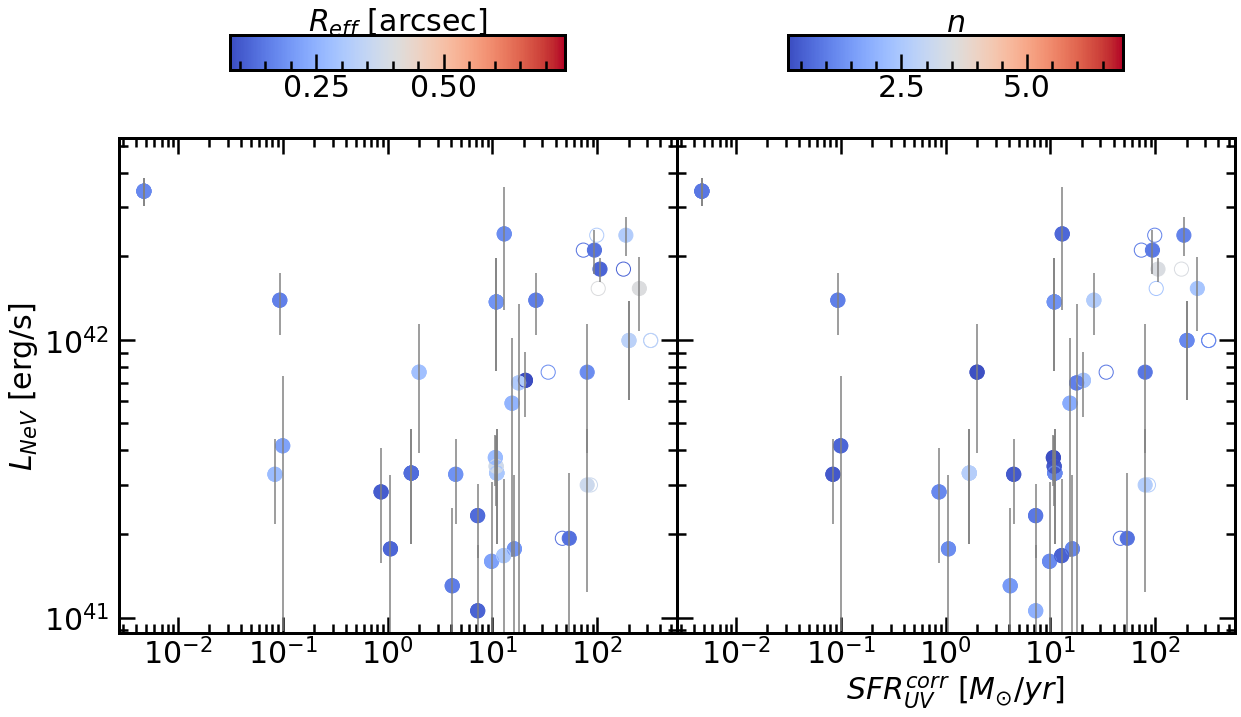

In [29]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{NeV}$ [erg/s]")
y0 = ax0.scatter(nevdf['ir_SFR-UV_corr'][nevdf['gf_f_j'] == 0], nevdf['NeV_L'][nevdf['gf_f_j'] == 0], s=200, c=nevdf['gf_re_j'][nevdf['gf_f_j'] == 0], cmap='coolwarm')
ax0.errorbar(nevdf['ir_SFR-UV_corr'][nevdf['gf_f_j'] == 0] , nevdf['NeV_L'][nevdf['gf_f_j'] == 0] , yerr = nevdf['NeV_L_ERR'][nevdf['gf_f_j'] == 0]  , linestyle = 'None' , c = 'grey' )
#ax0.axis([min(nevdf['ir_SFR-UV_corr']) -10**-6 , max(nevdf['ir_SFR-UV_corr']) + 10 , min(nevdf['NeV_L']) - 10**36, max(nevdf['NeV_L'])  + 10**41])
scatterdots = ax0.scatter(nevdf['ir_SFR-ladder_total'][nevdf['gf_f_j'] == 0], nevdf['NeV_L'][nevdf['gf_f_j'] == 0], s=200, c=nevdf['gf_re_j'][nevdf['gf_f_j'] == 0], cmap='coolwarm')
scatterdots.set_facecolor('none') 
#ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]")
y1 = ax1.scatter(nevdf['ir_SFR-UV_corr'][nevdf['gf_f_j'] == 0], nevdf['NeV_L'][nevdf['gf_f_j'] == 0], s=200, c=nevdf['gf_n_j'][nevdf['gf_f_j'] == 0], cmap='coolwarm')
ax1.errorbar(nevdf['ir_SFR-UV_corr'][nevdf['gf_f_j'] == 0] , nevdf['NeV_L'][nevdf['gf_f_j'] == 0] , yerr = nevdf['NeV_L_ERR'][nevdf['gf_f_j'] == 0]  , linestyle = 'None' , c = 'grey' )
#ax1.axis([min(nevdf['ir_SFR-UV_corr']) -10**-6 , max(nevdf['ir_SFR-UV_corr']) + 10 , min(nevdf['NeV_L']) - 10**36, max(nevdf['NeV_L'])  + 10**41])
scatterdots1 = ax1.scatter(nevdf['ir_SFR-ladder_total'][nevdf['gf_f_j'] == 0], nevdf['NeV_L'][nevdf['gf_f_j'] == 0], s=200, c=nevdf['gf_n_j'][nevdf['gf_f_j'] == 0], cmap='coolwarm')
scatterdots1.set_facecolor('none') 
#ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$R_{eff}$ [arcsec]')
ax3.xaxis.set_label_position('top')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$n$')
ax4.xaxis.set_label_position('top')

plt.show()

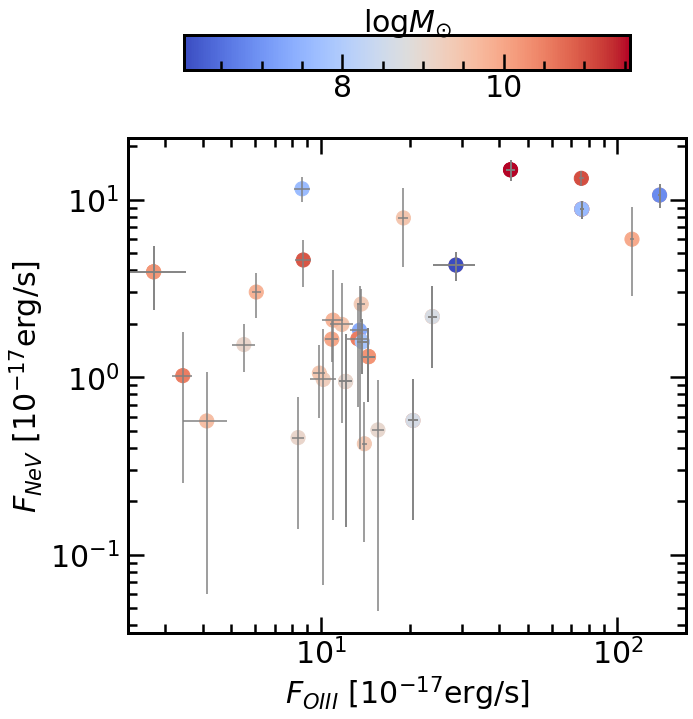

In [8]:
fig = plt.figure(figsize = (10 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:10])
ax0.set_xlabel(r'$F_{OIII}~[10^{-17}$erg/s]')
ax0.set_ylabel(r'$F_{NeV}~[10^{-17}$erg/s]')
y0 = ax0.scatter(nevdf['OIII_FLUX_y'] , nevdf['NeV-3426_FLUX'] , s = 200 , c = nevdf['td_lmass'] , cmap = 'coolwarm')
ax0.errorbar(nevdf['OIII_FLUX_y'] , nevdf['NeV-3426_FLUX'] , xerr = nevdf['OIII_FLUX_ERR_y'] , yerr = nevdf['NeV-3426_FLUX_ERR'] , linestyle = 'None' , c = 'gray')
#ax0.axis([0 , 150 , 0 , 20])
ax0.set_xscale('log')
ax0.set_yscale('log')
ax3 = fig.add_subplot(gs[0:1,1:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_{\odot}$')
ax3.xaxis.set_label_position('top')

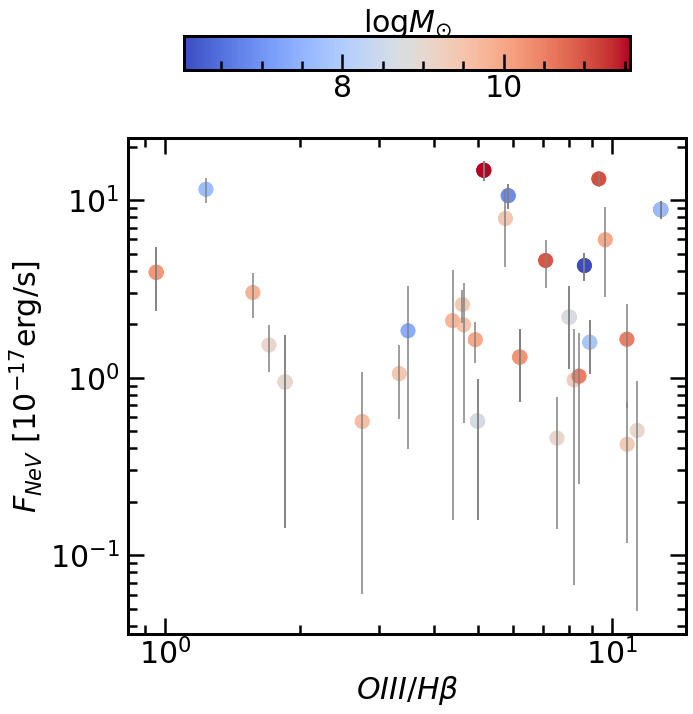

In [9]:
fig = plt.figure(figsize = (10 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:10])
ax0.set_xlabel(r'$OIII/H\beta$')
ax0.set_ylabel(r'$F_{NeV}~[10^{-17}$erg/s]')
y0 = ax0.scatter(nevdf['OIII_FLUX_y'][nevdf['OIII_FLUX_y'] > 0]/nevdf['Hb_FLUX_y'][nevdf['OIII_FLUX_y'] > 0] , nevdf['NeV-3426_FLUX'][nevdf['OIII_FLUX_y'] > 0] , s = 200 , c = nevdf['td_lmass'][nevdf['OIII_FLUX_y'] > 0] , cmap = 'coolwarm')
ax0.errorbar(nevdf['OIII_FLUX_y'][nevdf['OIII_FLUX_y'] > 0]/nevdf['Hb_FLUX_y'][nevdf['OIII_FLUX_y'] > 0] , nevdf['NeV-3426_FLUX'][nevdf['OIII_FLUX_y'] > 0] , yerr = nevdf['NeV-3426_FLUX_ERR'][nevdf['OIII_FLUX_y'] > 0] , linestyle = 'None' , c = 'gray')
#ax0.axis([0 , 150 , 0 , 20])
ax0.set_xscale('log')
ax0.set_yscale('log')
ax3 = fig.add_subplot(gs[0:1,1:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_{\odot}$')
ax3.xaxis.set_label_position('top')

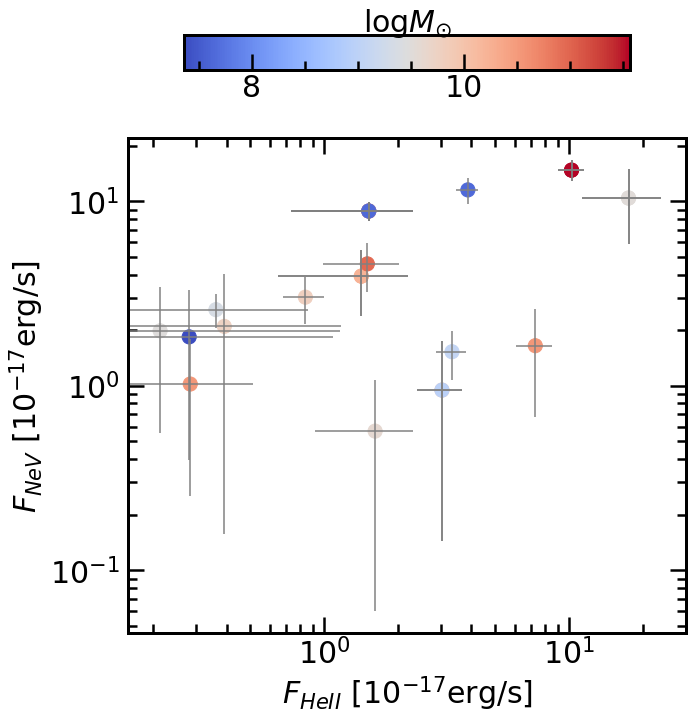

In [10]:
fig = plt.figure(figsize = (10 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:10])
ax0.set_xlabel(r'$F_{HeII}~[10^{-17}$erg/s]')
ax0.set_ylabel(r'$F_{NeV}~[10^{-17}$erg/s]')
y0 = ax0.scatter(nevdf['HeII-4687_FLUX'][nevdf['HeII-4687_FLUX'] > 0], nevdf['NeV-3426_FLUX'][nevdf['HeII-4687_FLUX'] > 0] , s = 200 , c = nevdf['td_lmass'][nevdf['HeII-4687_FLUX'] > 0] , cmap = 'coolwarm')
ax0.errorbar(nevdf['HeII-4687_FLUX'][nevdf['HeII-4687_FLUX'] > 0], nevdf['NeV-3426_FLUX'][nevdf['HeII-4687_FLUX'] > 0] , xerr = nevdf['HeII-4687_FLUX_ERR'][nevdf['HeII-4687_FLUX'] > 0] , yerr = nevdf['NeV-3426_FLUX_ERR'][nevdf['HeII-4687_FLUX'] > 0] , linestyle = 'None' , c = 'gray')
#ax0.axis([0 , 150 , 0 , 20])
ax0.set_xscale('log')
ax0.set_yscale('log')
ax3 = fig.add_subplot(gs[0:1,1:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_{\odot}$')
ax3.xaxis.set_label_position('top')

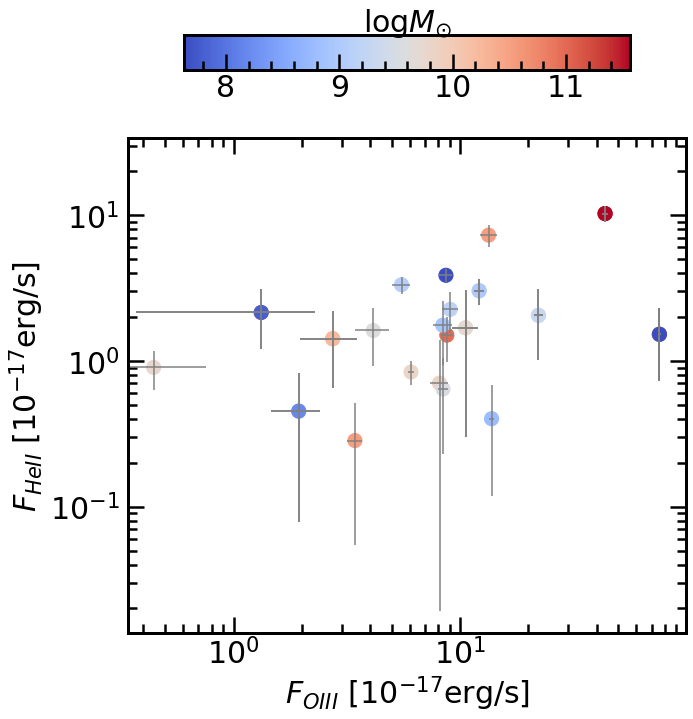

In [12]:
fig = plt.figure(figsize = (10 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:10])
ax0.set_xlabel(r'$F_{OIII}~[10^{-17}$erg/s]')
ax0.set_ylabel(r'$F_{HeII}~[10^{-17}$erg/s]')
y0 = ax0.scatter(heiidf['OIII_FLUX_y'] , heiidf['HeII-4687_FLUX'] , s = 200 , c = heiidf['td_lmass'] , cmap = 'coolwarm')
ax0.errorbar(heiidf['OIII_FLUX_y'] , heiidf['HeII-4687_FLUX'] , xerr = heiidf['OIII_FLUX_ERR_y'] , yerr = heiidf['HeII-4687_FLUX_ERR'] , linestyle = 'None' , c = 'gray')
#ax0.axis([0 , 80 , 0 , 12])
ax0.set_xscale('log')
ax0.set_yscale('log')
ax3 = fig.add_subplot(gs[0:1,1:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_{\odot}$')
ax3.xaxis.set_label_position('top')

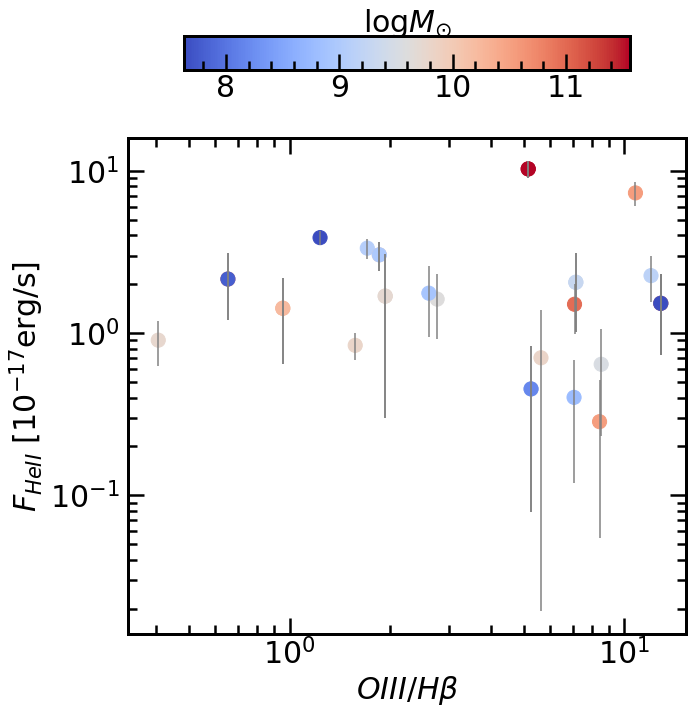

In [13]:
fig = plt.figure(figsize = (10 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:10])
ax0.set_xlabel(r'$OIII/H\beta$')
ax0.set_ylabel(r'$F_{HeII}~[10^{-17}$erg/s]')
y0 = ax0.scatter(heiidf['OIII_FLUX_y'][heiidf['OIII_FLUX_y'] > 0]/heiidf['Hb_FLUX_y'][heiidf['OIII_FLUX_y'] > 0] , heiidf['HeII-4687_FLUX'][heiidf['OIII_FLUX_y'] > 0] , s = 200 , c = heiidf['td_lmass'][heiidf['OIII_FLUX_y'] > 0] , cmap = 'coolwarm')
ax0.errorbar(heiidf['OIII_FLUX_y'][heiidf['OIII_FLUX_y'] > 0]/heiidf['Hb_FLUX_y'][heiidf['OIII_FLUX_y'] > 0] , heiidf['HeII-4687_FLUX'][heiidf['OIII_FLUX_y'] > 0] , yerr = heiidf['HeII-4687_FLUX_ERR'][heiidf['OIII_FLUX_y'] > 0] , linestyle = 'None' , c = 'gray')
#ax0.axis([0 , 150 , 0 , 20])
ax0.set_xscale('log')
ax0.set_yscale('log')
ax3 = fig.add_subplot(gs[0:1,1:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_{\odot}$')
ax3.xaxis.set_label_position('top')

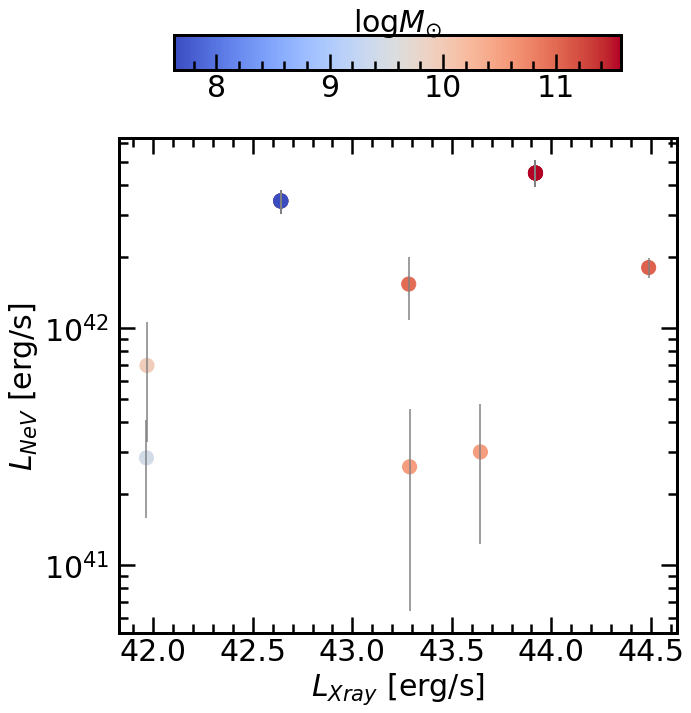

In [26]:
fig = plt.figure(figsize = (10 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:10])
ax0.set_xlabel(r'$L_{Xray}$ [erg/s]')
ax0.set_ylabel(r'$L_{NeV}$ [erg/s]')
y0 = ax0.scatter(nevxraydf['LOG_X_LUM'] , nevxraydf['NeV_L'] , s = 200 , c = nevxraydf['td_lmass'] , cmap = 'coolwarm')
ax0.errorbar(nevxraydf['LOG_X_LUM'] , nevxraydf['NeV_L'] , yerr = nevxraydf['NeV_L_ERR'] , linestyle = 'None' , c = 'gray')
#ax0.axis([0 , 150 , 0 , 20])
# ax0.set_xscale('log')
ax0.set_yscale('log')
ax3 = fig.add_subplot(gs[0:1,1:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_{\odot}$')
ax3.xaxis.set_label_position('top')

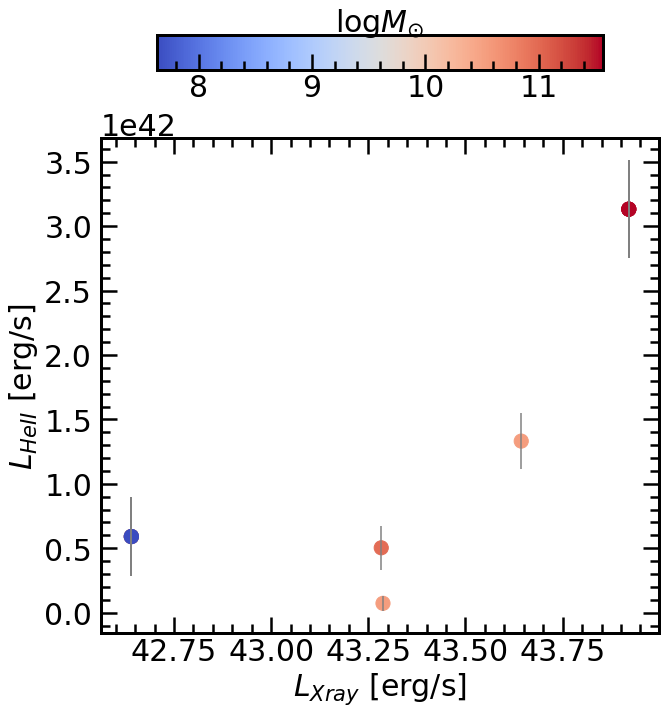

In [28]:
fig = plt.figure(figsize = (10 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:10])
ax0.set_xlabel(r'$L_{Xray}$ [erg/s]')
ax0.set_ylabel(r'$L_{HeII}$ [erg/s]')
y0 = ax0.scatter(heiixraydf['LOG_X_LUM'] , heiixraydf['HeII_L'] , s = 200 , c = heiixraydf['td_lmass'] , cmap = 'coolwarm')
ax0.errorbar(heiixraydf['LOG_X_LUM'] , heiixraydf['HeII_L'] , yerr = heiixraydf['HeII_L_ERR'] , linestyle = 'None' , c = 'gray')
#ax0.axis([0 , 150 , 0 , 20])
# ax0.set_xscale('log')
#ax0.set_yscale('log')
ax3 = fig.add_subplot(gs[0:1,1:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'log$M_{\odot}$')
ax3.xaxis.set_label_position('top')